In [1]:
import math
import warnings  
from tqdm import tqdm
import time
import pandas as pd
import os

import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei']

In [2]:
lis = ['data', 'vis']
for i in lis:
    if os.path.isdir(i):
        print("%-5s目錄存在，不建立。"%i)
    else:
        os.makedirs(i)

data 目錄存在，不建立。
vis  目錄存在，不建立。


In [3]:
filename = './data/train.csv'
df = pd.read_csv(filename)

## Note
- y = LEVEL

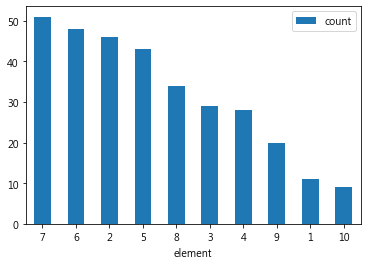

In [4]:
df_col = df['LEVEL']

label_count = df_col.value_counts()
label_element = label_count.index

tmp = pd.DataFrame({'element':label_element, 'count':label_count})
tmp.plot.bar(x = 'element', y = 'count', rot=0)

In [5]:
print(df.dtypes.unique())
df.dtypes[df.dtypes == df.dtypes.unique()[0]]
 
df_type_group = dict()
for i in df.dtypes.unique():
    df_type_group[str(i)] = df.loc[:, df.dtypes == i]
    
# df_type_group

[dtype('O') dtype('int64') dtype('float64')]


7     51
6     48
2     46
5     43
8     34
3     29
4     28
9     20
1     11
10     9
Name: LEVEL, dtype: int64

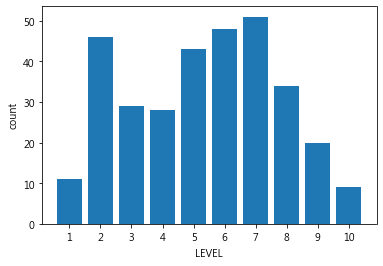

In [6]:
import matplotlib.pyplot as plt
def column_unique_count(df_col):
    y = df_col.value_counts()
    x = y.index
        
    plt.bar(x , y)
    plt.xticks(x, x, rotation='horizontal')
    plt.xlabel(df_col.name)
    plt.ylabel('count')
    return y
column_unique_count(df['LEVEL'])


## Note
- 先EDA名目尺度(object)，考慮要不要one-hot，或是做label encoding。
- EDA項目: 
 - print: 眾數

In [7]:
type(df_type_group['object'])
df_type_group['object']

,Station,County,Location
0,E02,宜蘭縣,大溪
1,E02,宜蘭縣,大溪
2,E02,宜蘭縣,大溪
3,E02,宜蘭縣,大溪
4,E03,宜蘭縣,頭城
...,...,...,...
314,TT02,台東縣長濱鄉中成,長光
315,TT03,台東縣長濱鄉,白桑安
316,TT03,台東縣長濱鄉,白桑安/長濱觀景平台
317,TT03,台東縣長濱鄉,白桑安/長濱觀景平台


E08     4
SE07    4
SW01    4
N04     4
SW12    4
       ..
M14     4
N11     4
N10     4
SE19    4
M17     3
Name: Station, Length: 80, dtype: int64

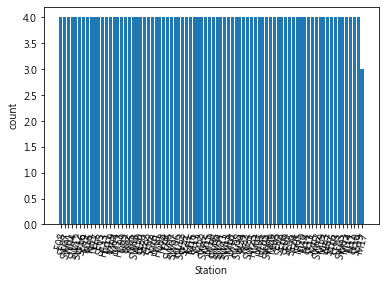

In [8]:
import matplotlib.pyplot as plt
def column_unique_count(df_col):
    y = df_col.value_counts()
    x = y.index
    print()
    plt.bar(x , y)
    plt.xticks(x, x, rotation=75)
    plt.xlabel(df_col.name)
    plt.ylabel('count')
    return y
column_unique_count(df['Station'])

## 每個Station都是4筆資料

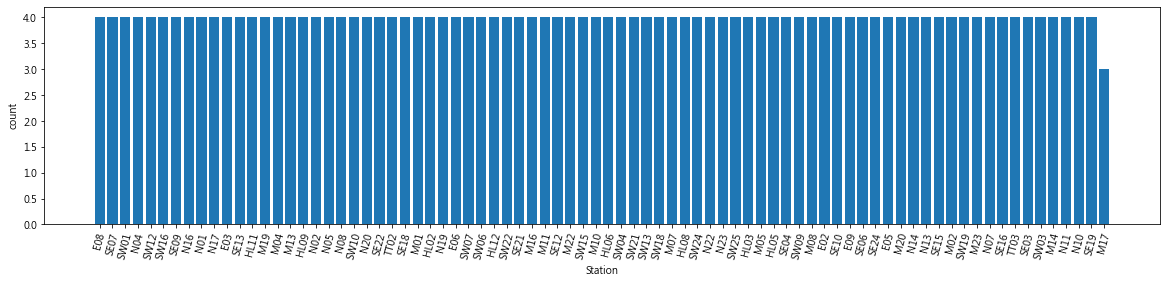

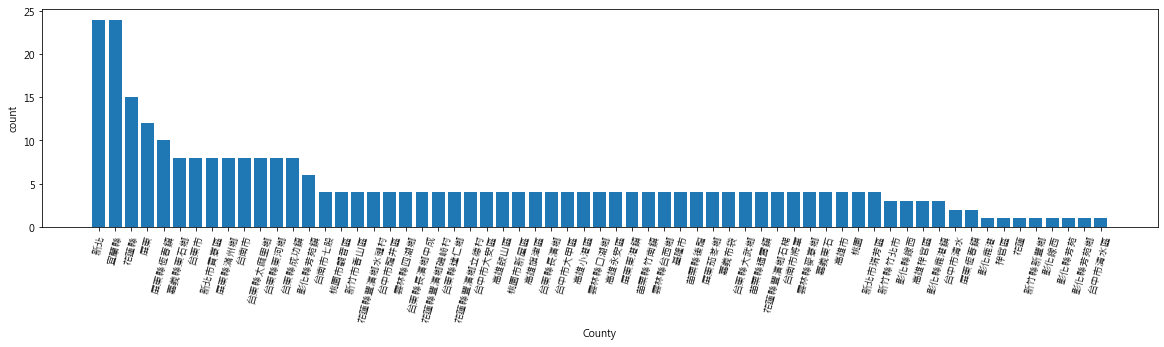

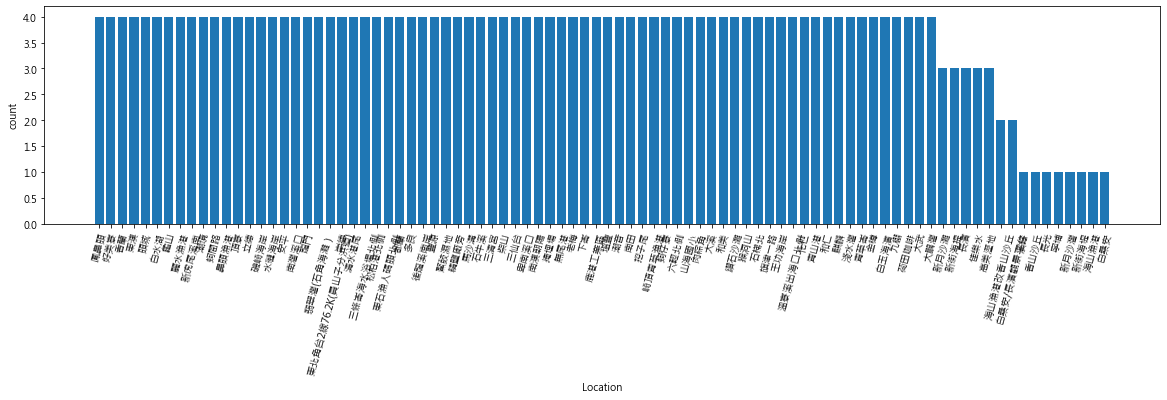

In [9]:
tmp = df_type_group['object'].copy()
# tmp.mode(axis = 1)[0

for i in tmp.columns:
#     print(tmp[i].describe())
#     print(tmp[i].value_counts().median())
    
    plt.figure(12, figsize=(20,4))
#     print(tmp[i].value_counts())
    column_unique_count(tmp[i])
    plt.show()

In [55]:
class TestB():
    def __init__(self, attr=1):
        self.attr = attr

In [151]:
class A(object):
    def __init__(self):
        super(A, self).__init__()
        print('a')


class B(object):
    def __init__(self):
        super(B, self).__init__()
        print('b')


class C(A, B):
    def __init__(self):
        super(C, self).__init__()
        print('c')

print(C.mro())
c = C()

[<class '__main__.C'>, <class '__main__.A'>, <class '__main__.B'>, <class 'object'>]
b
a
c


In [218]:
class basic_method:
    def get_var_name(var):
        my_var_name = [ k for k,v in globals().items() if v is var][0]
        return my_var_name

class nominal_analysis(basic_method):
    import pandas as pd
    
    def __init__(self, arr):
        self.DataFrame = pd.DataFrame({get_var_name(arr):arr})
#         print(self.DataFrame)
        
        
    def nominal_basic_stastic(self):
        function_name = str([v for k,v in locals().items()][0]).split('.')[1].split(' ')[0]
        print(function_name)
        df = self.DataFrame
        print('-'*40)
        print('Describe')
        print(df.describe())
        print('---')
        print('Quantile')
        print(df.quantile([.25, .5, .75]))
        print('-'*40)
        
    def get_var_name(arr):
        super().get_var_name

class auto_analysis_object(nominal_analysis):
    def __init__(self, arr):
        super(auto_analysis_object, self).__init__(arr)    
        self.array_name = get_var_name(arr)
        self.data = arr

# |

lis = [1,2,3]
# a = nominal_analysis(lis)
# a.nominal_basic_stastic()
   
a = auto_analysis_object(lis)
a.nominal_basic_stastic()
# #     def nominal_analysis 
# #     _analysis():
# lis = [1,2,3]
# abcd = auto_analysis_object(lis)
# # abcd.nominal_data_analysis()
# abcd.get_var_name(lis)
# # nominal_analysis(lis)
# # abcd.nominal_data_analysis()

auto_analysis_object
----------------------------------------
Describe
       lis
count  3.0
mean   2.0
std    1.0
min    1.0
25%    1.5
50%    2.0
75%    2.5
max    3.0
---
Quantile
      lis
0.25  1.5
0.50  2.0
0.75  2.5
----------------------------------------


In [154]:
tmp = df_type_group['object'].copy()
# tmp.mode(axis = 1)[0

for i in tmp.columns:
    print(i)
    print('---\nData describe: \n',tmp[i].describe())

    a = tmp[i].value_counts()
#     print('中位數的出現次數', a.median())
    print('---\nQuartile: \n', a.quantile([.25, .5, .75]))
    print('Auto msg')
    if len(a.quantile([.25, .5, .75]).unique()) == 1:
           print('資料的中位數、3/4、1/4位距的元素相同')
    print('*'*80)


Station
---
Data describe: 
 count     319
unique     80
top       E08
freq        4
Name: Station, dtype: object
---
Quartile: 
 0.25    4.0
0.50    4.0
0.75    4.0
Name: Station, dtype: float64
Auto msg
資料的中位數、3/4、1/4位距的元素相同
********************************************************************************
County
---
Data describe: 
 count     319
unique     63
top        新北
freq       24
Name: County, dtype: object
---
Quartile: 
 0.25    4.0
0.50    4.0
0.75    4.0
Name: County, dtype: float64
Auto msg
資料的中位數、3/4、1/4位距的元素相同
********************************************************************************
Location
---
Data describe: 
 count     319
unique     88
top       鳳鼻頭
freq        4
Name: Location, dtype: object
---
Quartile: 
 0.25    4.0
0.50    4.0
0.75    4.0
Name: Location, dtype: float64
Auto msg
資料的中位數、3/4、1/4位距的元素相同
********************************************************************************


In [ ]:
tmp

In [ ]:
def count_all_columns(df):
    tmp = df.copy()
    plt.figure(12, figsize=(28,25))
    
    
    a = len(tmp.columns)
    col = math.ceil(a**0.5)

    warnings.filterwarnings('ignore')
    bar_else = []

    for i in tqdm(range(1,a)):
        
        plt.subplot(col, col, i)

        if len(df.iloc[:,i].unique())<=50:
            column_unique_count(tmp.iloc[:,i])
        else: 
            plt.text(0.5, 0.5, 'too many element', horizontalalignment='center', 
         verticalalignment='center')
            bar_else.append(df.iloc[:,i].name)
            pass

    print(bar_else)
    plt.show()
    return(bar_else)
    
# non_cat_col = count_all_columns(df)

In [ ]:
# ecdf
df.loc[:,non_cat_col]

In [ ]:
df.describe().columns